In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
results_df = pd.read_csv('data/ems_weather.csv').drop(columns=['Unnamed: 0'])
features = results_df.columns

In [17]:
columns = results_df.columns
d = []
for col in columns:
    nulls = results_df[col].isna().sum()
    d.append({'column': col, 'NULLS': nulls})
chk = pd.DataFrame(d)
chk[chk['NULLS']>0]

,column,NULLS
847,AWND,831


In [19]:
y = np.array(results_df['INCIDENT_RESPONSE_SECONDS_QY'])

# definitely drop these:
drop_features = ['INCIDENT_RESPONSE_SECONDS_QY', 
                 'CAD_INCIDENT_ID', 
                 'FIRST_ASSIGNMENT_DATETIME', 
                 'DISPATCH_RESPONSE_SECONDS_QY']
# suggest dropping these: 
drop_features += list(features[230:594]) # zip codes
drop_features += list(features[670:831]) # city council district, community district, community school dist, congressional district
drop_features += ['AWND']

X = np.array(results_df.drop(columns=drop_features))



In [20]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# Scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [21]:
X_train.shape

(15019, 324)

In [22]:
np.power(15019/325,.5)

6.797963495952865

In [52]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation=None))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

results = model.fit(X_train_sc, y_train, epochs=100, batch_size=256, validation_data=(X_test_sc, y_test))



Train on 15019 samples, validate on 5007 samples
Epoch 1/100
15019/15019 [==============================] - 4s 257us/sample - loss: 533151.8527 - mae: 525.0283 - val_loss: 512884.0762 - val_mae: 525.6254
Epoch 2/100
15019/15019 [==============================] - 1s 65us/sample - loss: 516950.4110 - mae: 511.6838 - val_loss: 474324.5286 - val_mae: 494.3198
Epoch 3/100
15019/15019 [==============================] - 1s 63us/sample - loss: 429606.6628 - mae: 439.4696 - val_loss: 327578.6114 - val_mae: 362.3337
Epoch 4/100
15019/15019 [==============================] - 1s 65us/sample - loss: 258183.8213 - mae: 284.2370 - val_loss: 186921.2667 - val_mae: 243.4196
Epoch 5/100
15019/15019 [==============================] - 1s 71us/sample - loss: 177879.6303 - mae: 225.3318 - val_loss: 151438.7257 - val_mae: 216.1390
Epoch 6/100
15019/15019 [==============================] - 1s 71us/sample - loss: 152467.6408 - mae: 206.2746 - val_loss: 130614.2282 - val_mae: 198.6271
Epoch 7/100
15019/15019 [=

In [53]:
preds = model.predict(X_test_sc)

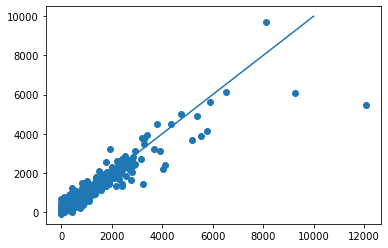

In [54]:
plt.scatter(y_test,preds);
plt.plot([0,10000],[0,10000]);

In [55]:
from sklearn.metrics import r2_score, mean_squared_error


In [56]:
r2_score(y_test,preds)

0.8980979268375695

In [57]:
mean_squared_error(y_test,preds,squared=False)

155.3796402668724

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                10400     
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 11,073
Trainable params: 11,073
Non-trainable params: 0
_________________________________________________________________


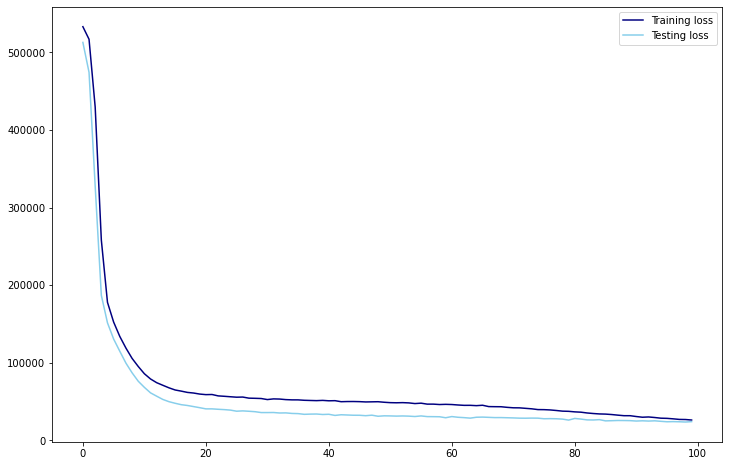

In [59]:
train_loss = results.history['loss']
test_loss = results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();